In [2]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from datetime import datetime

mpl.rcParams['figure.figsize'] = (12, 10)
mpl.rcParams['axes.grid'] = False

In [3]:
dataset = pd.read_csv("./datasets/final/final-formed-synthetic.csv", delimiter=',', date_format="%Y-%m-%d %H:%M:%S", parse_dates=['Timestamp'])

date_time = pd.to_datetime(dataset['Timestamp'], format='%Y-%m-%d %H:%M:%S')


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35041 entries, 0 to 35040
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Timestamp      35041 non-null  datetime64[ns]
 1   CPUTime        35041 non-null  float64       
 2   Memory         35041 non-null  float64       
 3   NJobs          35041 non-null  float64       
 4   NProcs         35041 non-null  float64       
 5   ArrivedJobs    35041 non-null  int64         
 6   CompletedJobs  35041 non-null  int64         
 7   cosHour        35041 non-null  float64       
 8   sinHour        35041 non-null  float64       
 9   cosDay         35041 non-null  float64       
 10  sinDay         35041 non-null  float64       
 11  cosMonth       35041 non-null  float64       
 12  sinMonth       35041 non-null  float64       
dtypes: datetime64[ns](1), float64(10), int64(2)
memory usage: 3.5 MB


In [5]:
dataset.head()

,Timestamp,CPUTime,Memory,NJobs,NProcs,ArrivedJobs,CompletedJobs,cosHour,sinHour,cosDay,sinDay,cosMonth,sinMonth
0,2018-01-01 00:00:00,1.060517e+06,1.574963e+08,237.883862,1663.992864,15,8,1.000000,0.000000,0.999852,0.017213,0.866025,0.5
1,2018-01-01 01:00:00,1.125058e+06,1.679650e+08,245.436361,1704.237100,7,3,0.965926,0.258819,0.999852,0.017213,0.866025,0.5
2,2018-01-01 02:00:00,1.031287e+06,1.526615e+08,215.937920,2302.502089,6,8,0.866025,0.500000,0.999852,0.017213,0.866025,0.5
3,2018-01-01 03:00:00,1.019123e+06,1.506224e+08,198.998278,579.824822,11,5,0.707107,0.707107,0.999852,0.017213,0.866025,0.5
4,2018-01-01 04:00:00,1.178008e+06,1.763897e+08,250.351872,1862.300267,9,4,0.500000,0.866025,0.999852,0.017213,0.866025,0.5


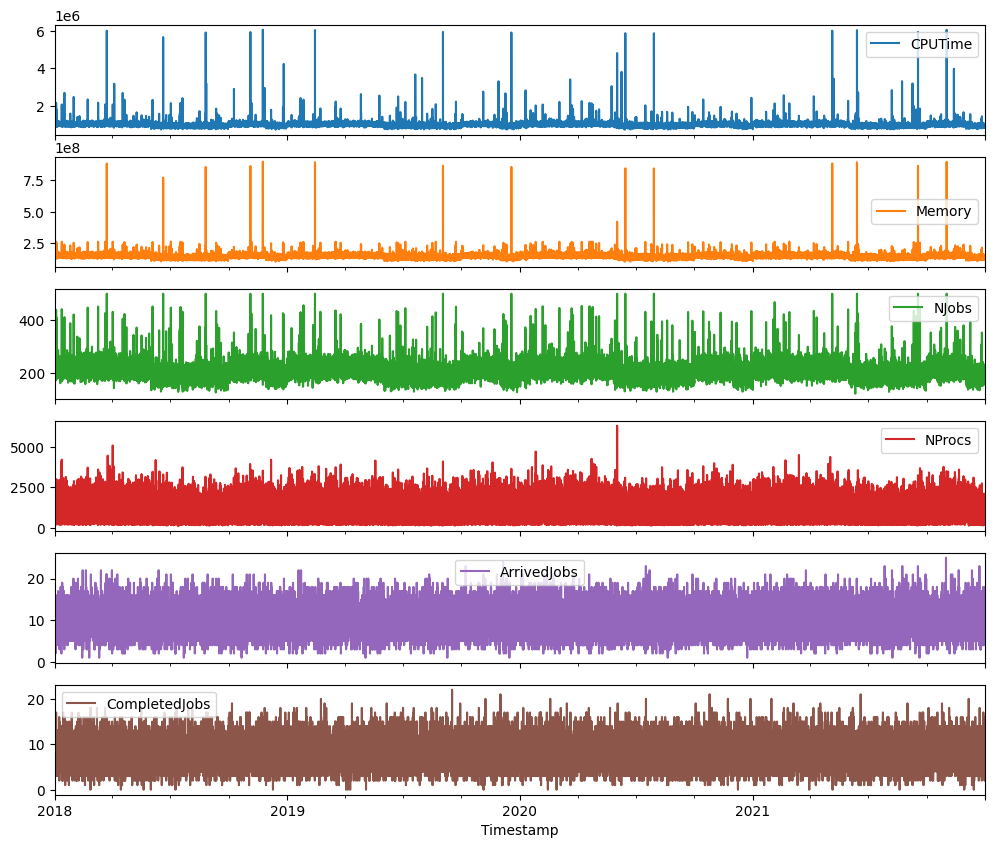

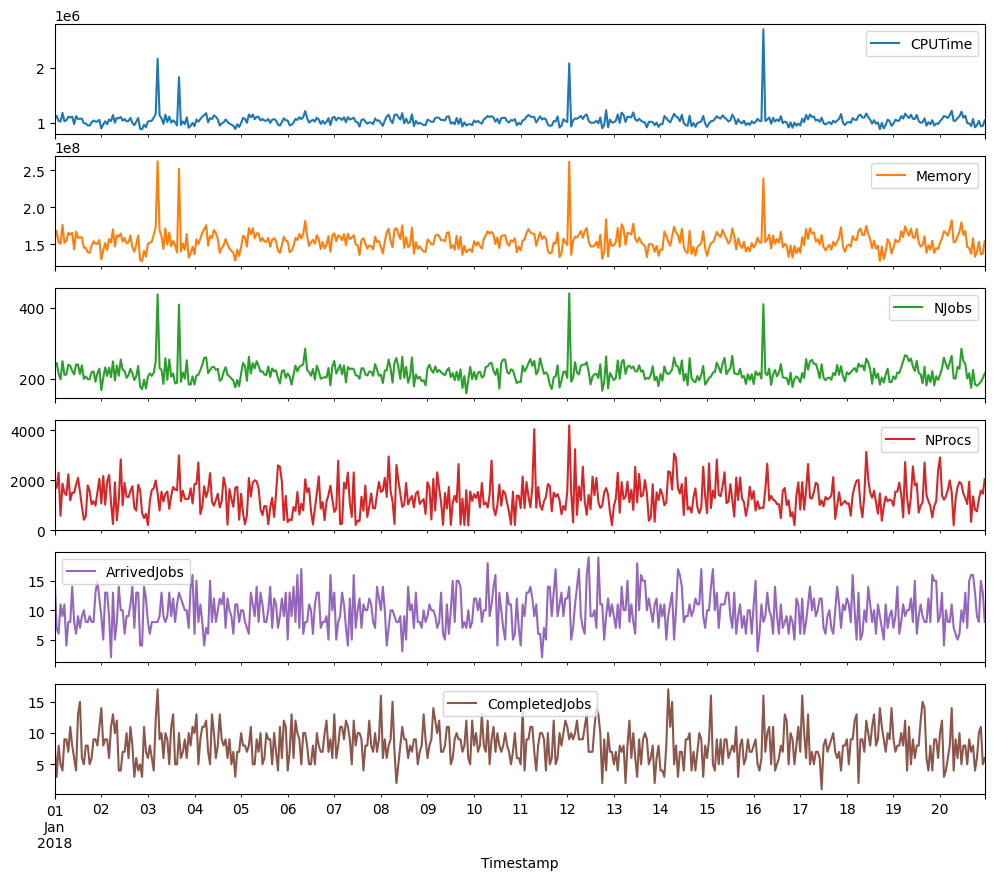

In [6]:
plot_cols = ['CPUTime', 'Memory', 'NJobs', 'NProcs', 'ArrivedJobs', 'CompletedJobs']
plot_features = dataset[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

plot_features = dataset[plot_cols][:480]
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=True)

In [7]:
dataset.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
Timestamp,35041,2020-01-01 00:00:00,2018-01-01 00:00:00,2019-01-01 00:00:00,2020-01-01 00:00:00,2020-12-31 00:00:00,2021-12-31 00:00:00,NaN
CPUTime,35041.0,1005093.993152,734192.972351,944356.705537,998791.131652,1053666.736865,6062456.352956,150669.578315
Memory,35041.0,147778646.846538,102566413.804499,138097543.619453,147237300.568588,156364408.890586,897908146.955741,20542172.750255
NJobs,35041.0,207.250182,119.811041,188.506463,206.135609,224.038601,500.0,29.323201
NProcs,35041.0,1260.231439,131.069783,800.875131,1224.396609,1664.309194,6284.498304,630.047327
ArrivedJobs,35041.0,10.014355,1.0,8.0,10.0,12.0,25.0,3.142977
CompletedJobs,35041.0,8.03162,0.0,6.0,8.0,10.0,22.0,2.839519
cosHour,35041.0,0.000029,-1.0,-0.707107,0.0,0.707107,1.0,0.707127
sinHour,35041.0,-0.0,-1.0,-0.707107,0.0,0.707107,1.0,0.707107
cosDay,35041.0,0.000028,-0.999963,-0.708627,0.004304,0.702527,1.0,0.707127


In [8]:
dataset.drop(columns=["Timestamp"], inplace=True)

dataset.head()

,CPUTime,Memory,NJobs,NProcs,ArrivedJobs,CompletedJobs,cosHour,sinHour,cosDay,sinDay,cosMonth,sinMonth
0,1.060517e+06,1.574963e+08,237.883862,1663.992864,15,8,1.000000,0.000000,0.999852,0.017213,0.866025,0.5
1,1.125058e+06,1.679650e+08,245.436361,1704.237100,7,3,0.965926,0.258819,0.999852,0.017213,0.866025,0.5
2,1.031287e+06,1.526615e+08,215.937920,2302.502089,6,8,0.866025,0.500000,0.999852,0.017213,0.866025,0.5
3,1.019123e+06,1.506224e+08,198.998278,579.824822,11,5,0.707107,0.707107,0.999852,0.017213,0.866025,0.5
4,1.178008e+06,1.763897e+08,250.351872,1862.300267,9,4,0.500000,0.866025,0.999852,0.017213,0.866025,0.5


In [9]:
column_indices = {name: i for i, name in enumerate(dataset.columns)}

n = len(dataset)
train_df = dataset[0:int(n*0.65)]
val_df = dataset[int(n*0.65):int(n*0.85)]
test_df = dataset[int(n*0.85):]

num_features = dataset.shape[1]

In [10]:
train_df.head()

,CPUTime,Memory,NJobs,NProcs,ArrivedJobs,CompletedJobs,cosHour,sinHour,cosDay,sinDay,cosMonth,sinMonth
0,1.060517e+06,1.574963e+08,237.883862,1663.992864,15,8,1.000000,0.000000,0.999852,0.017213,0.866025,0.5
1,1.125058e+06,1.679650e+08,245.436361,1704.237100,7,3,0.965926,0.258819,0.999852,0.017213,0.866025,0.5
2,1.031287e+06,1.526615e+08,215.937920,2302.502089,6,8,0.866025,0.500000,0.999852,0.017213,0.866025,0.5
3,1.019123e+06,1.506224e+08,198.998278,579.824822,11,5,0.707107,0.707107,0.999852,0.017213,0.866025,0.5
4,1.178008e+06,1.763897e+08,250.351872,1862.300267,9,4,0.500000,0.866025,0.999852,0.017213,0.866025,0.5


### Normalize the data

It is important to scale features before training a neural network. Normalization is a common way of doing this scaling: subtract the mean and divide by the standard deviation of each feature.

The mean and standard deviation should only be computed using the training data so that the models have no access to the values in the validation and test sets.

It's also arguable that the model shouldn't have access to future values in the training set when training, and that this normalization should be done using moving averages. That's not the focus of this tutorial, and the validation and test sets ensure that you get (somewhat) honest metrics. So, in the interest of simplicity this tutorial uses a simple average.

In [11]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

In [12]:
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CPUTime,22776.0,-2.470802e-16,1.0,-1.751248,-0.389957,-3.922888e-02,0.306434,32.302318
Memory,22776.0,-7.736855e-17,1.0,-2.171354,-0.459614,-2.127554e-02,0.405414,35.637563
NJobs,22776.0,5.266053e-16,1.0,-2.806346,-0.630886,-3.371052e-02,0.567580,9.838014
NProcs,22776.0,-3.618851e-16,1.0,-1.788515,-0.731656,-5.404335e-02,0.645248,7.911493
ArrivedJobs,22776.0,2.059002e-17,1.0,-2.864260,-0.633204,4.240114e-03,0.641685,4.466352
CompletedJobs,22776.0,-1.974770e-16,1.0,-2.833343,-0.715113,-9.036763e-03,0.697040,4.933499
cosHour,22776.0,-6.416832e-17,1.0,-1.414183,-0.999978,-1.046216e-17,0.999978,1.414183
sinHour,22776.0,-1.747032e-17,1.0,-1.414183,-0.999978,1.053991e-16,0.999978,1.414183
cosDay,22776.0,2.994911e-17,1.0,-1.344525,-1.018800,-3.849976e-02,0.997608,1.447703
sinDay,22776.0,3.993215e-17,1.0,-1.613783,-0.942372,1.376010e-01,0.965671,1.292822


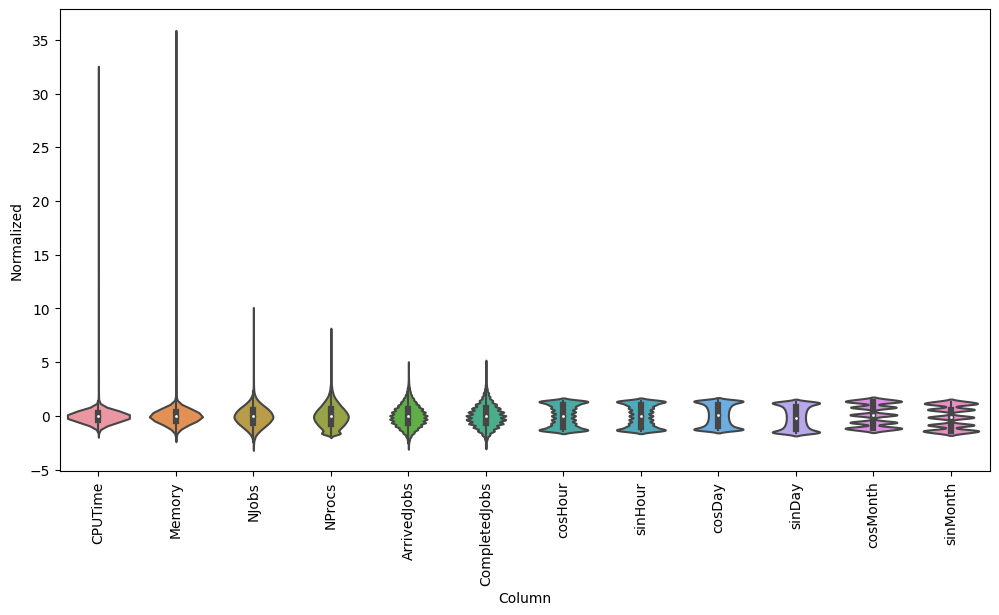

In [13]:
df_std = (dataset - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(dataset.keys(), rotation=90)

## Data windowing

The models in this tutorial will make a set of predictions based on a window of consecutive samples from the data. 

The main features of the input windows are:

- The width (number of time steps) of the input and label windows.
- The time offset between them.
- Which features are used as inputs, labels, or both. 


### 1. Indexes and offsets

Start by creating the `WindowGenerator` class. The `__init__` method includes all the necessary logic for the input and label indices.

It also takes the training, evaluation, and test DataFrames as input. These will be converted to `tf.data.Dataset`s of windows later.

In [14]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.window_size)[self.input_slice]

    self.label_start = self.window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [15]:
w1 = WindowGenerator(input_width=24, label_width=1, shift=24,
                     label_columns=['ArrivedJobs'])
w1

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [47]
Label column name(s): ['ArrivedJobs']

In [16]:
w2 = WindowGenerator(input_width=6, label_width=1, shift=1,
                     label_columns=['ArrivedJobs'])
w2

Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [6]
Label column name(s): ['ArrivedJobs']

### 2. Split

Given a list of consecutive inputs, the `window` method will convert them to a window of inputs and a window of labels.

In [17]:
def window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.window = window

In [18]:
# Stack three slices, the length of the total window.
window = tf.stack([np.array(train_df[:w2.window_size]),
                           np.array(train_df[100:100+w2.window_size]),
                           np.array(train_df[200:200+w2.window_size])])

example_inputs, example_labels = w2.window(window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 7, 12)
Inputs shape: (3, 6, 12)
Labels shape: (3, 1, 1)


### 3. Plot

Here is a plot method that allows a simple visualization of the split window:

In [19]:
w2.example = example_inputs, example_labels

In [20]:
def plot(self, model=None, plot_col='CPUTime', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot

### 4. Create `tf.data.Dataset`s

Finally, this `make_dataset` method will take a time series DataFrame and convert it to a `tf.data.Dataset` of `(window, window)` pairs using the `tf.keras.utils.timeseries_dataset_from_array` function:

In [21]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.window)

  return ds

WindowGenerator.make_dataset = make_dataset

The `WindowGenerator` object holds training, validation, and test data.

Add properties for accessing them as `tf.data.Dataset`s using the `make_dataset` method you defined earlier. Also, add a standard example batch for easy access and plotting:

In [22]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

Now, the `WindowGenerator` object gives you access to the `tf.data.Dataset` objects, so you can easily iterate over the data.

The `Dataset.element_spec` property tells you the structure, data types, and shapes of the dataset elements.

In [23]:
# Each element is an (inputs, label) pair.
w2.train.element_spec

(TensorSpec(shape=(None, 6, 12), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

Iterating over a `Dataset` yields concrete batches:

In [24]:
for example_inputs, example_labels in w2.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 6, 12)
Labels shape (batch, time, features): (32, 1, 1)


2023-07-26 14:58:23.966051: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_14' with dtype int32
	 [[{{node Placeholder/_14}}]]
2023-07-26 14:58:23.966391: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_14' with dtype int32
	 [[{{node Placeholder/_14}}]]


## Single step models

The simplest model you can build on this sort of data is one that predicts a single feature's value—1 time step (one hour) into the future based only on the current conditions.

So, start by building models to predict the `T (degC)` value one hour into the future.

![Predict the next time step](images/narrow_window.png)

Configure a `WindowGenerator` object to produce these single-step `(input, label)` pairs:

In [25]:
val_performance = {}
performance = {}
MAX_EPOCHS = 50

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.legacy.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

def descale(data, column):
    return data * train_std[column] + train_mean[column]

def evaluate_model(model, window, column, name):
    # Extract the predictions and labels from the mapdataset
    preds = np.array([])
    labels = np.array([])
    val_preds = np.array([])
    val_labels = np.array([])

    for input, label in window.test:
      pred_array = model(input)[:,0,0].numpy()
      preds = np.append(preds, pred_array)
      labels= np.append(labels, label[:,0,0].numpy())
    preds = descale(preds, column)
    labels = descale(labels, column)

    for input, label in window.val:
      pred_array = model(input)[:,0,0].numpy()
      val_preds = np.append(val_preds, pred_array)
      val_labels= np.append(val_labels, label[:,0,0].numpy())
    val_preds = descale(val_preds, column)
    val_labels = descale(val_labels, column)
    
    # MAE 
    val_mae = sum(np.abs(val_preds - val_labels)) / len(val_preds)
    mae = sum(np.abs(preds - labels)) / len(preds)

    #normaized MAE
    val_mae_norm = val_mae / val_labels.mean()
    mae_norm = mae / labels.mean()

    #ME
    val_me = sum(val_preds - val_labels) / len(val_preds)
    me = sum(preds - labels) / len(preds)

    #normalized ME
    val_me_norm = val_me / val_labels.mean()
    me_norm = me / labels.mean()

    val_performance[name] = [val_mae_norm, val_me_norm]
    performance[name] = [mae_norm, me_norm]

    return [val_mae_norm, val_me_norm], [mae_norm, me_norm]

In [26]:
LABELS = 'CPUTime'

In [27]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=[LABELS])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['CPUTime']

The `window` object creates `tf.data.Dataset`s from the training, validation, and test sets, allowing you to easily iterate over batches of data.


### Baseline

Before building a trainable model it would be good to have a performance baseline as a point for comparison with the later more complicated models.

This first task is to predict temperature one hour into the future, given the current value of all features. The current values include the current temperature. 

So, start with a model that just returns the current temperature as the prediction, predicting "No change". This is a reasonable baseline since temperature changes slowly. Of course, this baseline will work less well if you make a prediction further in the future.

![Send the input to the output](images/baseline.png)

In [28]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

Instantiate and evaluate this model:

In [29]:
baseline = Baseline(label_index=column_indices[LABELS])

baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                 metrics=[tf.keras.metrics.MeanAbsoluteError()])

evaluate_model(baseline, single_step_window, LABELS, 'Baseline')

2023-07-26 14:58:24.139949: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [5257,12]
	 [[{{node Placeholder/_0}}]]
2023-07-26 14:58:24.141081: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_13' with dtype int32
	 [[{{node Placeholder/_13}}]]


2023-07-26 14:58:24.354906: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_14' with dtype int32
	 [[{{node Placeholder/_14}}]]
2023-07-26 14:58:24.355158: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_8' with dtype int32 and shape [7007]
	 [[{{node Placeholder/_8}}]]


([0.06557855234863282, -9.671008731541965e-06],
 [0.07664622175845515, 1.6276599861301258e-05])

That printed some performance metrics, but those don't give you a feeling for how well the model is doing.

The `WindowGenerator` has a plot method, but the plots won't be very interesting with only a single sample.

So, create a wider `WindowGenerator` that generates windows 24 hours of consecutive inputs and labels at a time. The new `wide_window` variable doesn't change the way the model operates. The model still makes predictions one hour into the future based on a single input time step. Here, the `time` axis acts like the `batch` axis: each prediction is made independently with no interaction between time steps:

In [30]:
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1,
    label_columns=[LABELS])

wide_window

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s): ['CPUTime']

In the above plots of three examples the single step model is run over the course of 24 hours. This deserves some explanation:

- The blue `Inputs` line shows the input temperature at each time step. The model receives all features, this plot only shows the temperature.
- The green `Labels` dots show the target prediction value. These dots are shown at the prediction time, not the input time. That is why the range of labels is shifted 1 step relative to the inputs.
- The orange `Predictions` crosses are the model's prediction's for each output time step. If the model were predicting perfectly the predictions would land directly on the `Labels`.

### Dense model



In [31]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=16, activation='relu'),
    tf.keras.layers.Dense(units=8, activation='relu'),
    tf.keras.layers.Dense(units=2)
])

In [32]:
compile_and_fit(dense, single_step_window)

evaluate_model(dense, single_step_window, LABELS, 'Dense')

Epoch 1/50


2023-07-26 14:58:24.625392: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_14' with dtype int32
	 [[{{node Placeholder/_14}}]]
2023-07-26 14:58:24.625650: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_8' with dtype int32 and shape [22775]
	 [[{{node Placeholder/_8}}]]


711/712 [============================>.] - ETA: 0s - loss: 0.9165 - mean_absolute_error: 0.3710

2023-07-26 14:58:25.567755: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_8' with dtype int32 and shape [7007]
	 [[{{node Placeholder/_8}}]]
2023-07-26 14:58:25.568008: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_13' with dtype int32
	 [[{{node Placeholder/_13}}]]


712/712 [==============================] - 1s 1ms/step - loss: 0.9157 - mean_absolute_error: 0.3709 - val_loss: 0.4368 - val_mean_absolute_error: 0.3240
Epoch 2/50
712/712 [==============================] - 1s 1ms/step - loss: 0.8932 - mean_absolute_error: 0.3503 - val_loss: 0.4316 - val_mean_absolute_error: 0.3187
Epoch 3/50
712/712 [==============================] - 1s 1ms/step - loss: 0.8902 - mean_absolute_error: 0.3453 - val_loss: 0.4302 - val_mean_absolute_error: 0.3174
Epoch 4/50
712/712 [==============================] - 1s 1ms/step - loss: 0.8857 - mean_absolute_error: 0.3418 - val_loss: 0.4275 - val_mean_absolute_error: 0.3150
Epoch 5/50
712/712 [==============================] - 1s 1ms/step - loss: 0.8825 - mean_absolute_error: 0.3391 - val_loss: 0.4265 - val_mean_absolute_error: 0.3131
Epoch 6/50
712/712 [==============================] - 1s 1ms/step - loss: 0.8800 - mean_absolute_error: 0.3364 - val_loss: 0.4210 - val_mean_absolute_error: 0.3080
Epoch 7/50
712/712 [=======

2023-07-26 14:58:32.075581: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_14' with dtype int32
	 [[{{node Placeholder/_14}}]]
2023-07-26 14:58:32.075841: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_8' with dtype int32 and shape [5256]
	 [[{{node Placeholder/_8}}]]
2023-07-26 14:58:32.501331: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_8' with dtype int32 and shape [7007]
	 [[{{node Place

([0.04803442681925422, 0.0071066666697743065],
 [0.05585915032454731, 0.007150484229335493])

In [33]:
dense.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1, 32)             416       
                                                                 
 dense_1 (Dense)             (None, 1, 32)             1056      
                                                                 
 dropout (Dropout)           (None, 1, 32)             0         
                                                                 
 dense_2 (Dense)             (None, 1, 16)             528       
                                                                 
 dense_3 (Dense)             (None, 1, 8)              136       
                                                                 
 dense_4 (Dense)             (None, 1, 2)              18        
                                                                 
Total params: 2154 (8.41 KB)
Trainable params: 2154 (8.4

### Convolution neural network
 
A convolution layer (`tf.keras.layers.Conv1D`) also takes multiple time steps as input to each prediction.

Below is the **same** model as `multi_step_dense`, re-written with a convolution. 

Note the changes:
* The `tf.keras.layers.Flatten` and the first `tf.keras.layers.Dense` are replaced by a `tf.keras.layers.Conv1D`.
* The `tf.keras.layers.Reshape` is no longer necessary since the convolution keeps the time axis in its output.

In [34]:
CONV_WIDTH = 5
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=[LABELS])

conv_window

Total window size: 6
Input indices: [0 1 2 3 4]
Label indices: [5]
Label column name(s): ['CPUTime']

In [35]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=64,
                           kernel_size=(5,),
                           activation='relu'),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=16, activation='relu'),
    tf.keras.layers.Dense(units=2),
])

In [36]:
history = compile_and_fit(conv_model, conv_window)

IPython.display.clear_output()
evaluate_model(conv_model, conv_window, LABELS, 'Conv')

2023-07-26 14:58:44.113218: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_8' with dtype int32 and shape [5252]
	 [[{{node Placeholder/_8}}]]
2023-07-26 14:58:44.113478: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_13' with dtype int32
	 [[{{node Placeholder/_13}}]]
2023-07-26 14:58:44.747398: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_14' with dtype int32
	 [[{{node Placeholder/_14}}]]
2

([0.04772275837549574, 0.009452711716588865],
 [0.05547943987964731, 0.012351115119228989])

In [37]:
conv_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 1, 64)             3904      
                                                                 
 dropout_1 (Dropout)         (None, 1, 64)             0         
                                                                 
 dense_5 (Dense)             (None, 1, 64)             4160      
                                                                 
 dense_6 (Dense)             (None, 1, 256)            16640     
                                                                 
 dense_7 (Dense)             (None, 1, 256)            65792     
                                                                 
 dropout_2 (Dropout)         (None, 1, 256)            0         
                                                                 
 dense_8 (Dense)             (None, 1, 64)            

Note that the output is shorter than the input. To make training or plotting work, you need the labels, and prediction to have the same length. So build a `WindowGenerator` to produce wide windows with a few extra input time steps so the label and prediction lengths match: 

In [38]:
LABEL_WIDTH = 24
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    label_columns=[LABELS])

wide_conv_window

Total window size: 29
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27]
Label indices: [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28]
Label column name(s): ['CPUTime']

Now, you can plot the model's predictions on a wider window. Note the 3 input time steps before the first prediction. Every prediction here is based on the 3 preceding time steps:

### Recurrent neural network

A Recurrent Neural Network (RNN) is a type of neural network well-suited to time series data. RNNs process a time series step-by-step, maintaining an internal state from time-step to time-step.

You can learn more in the [Text generation with an RNN](https://www.tensorflow.org/text/tutorials/text_generation) tutorial and the [Recurrent Neural Networks (RNN) with Keras](https://www.tensorflow.org/guide/keras/rnn) guide.

In this tutorial, you will use an RNN layer called Long Short-Term Memory (`tf.keras.layers.LSTM`).

In [39]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.LSTM(64, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=16, activation='relu'),
    tf.keras.layers.Dense(units=16, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=8, activation='relu'),
    tf.keras.layers.Dense(units=2)
])

In [40]:
history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
evaluate_model(lstm_model, wide_window, LABELS, 'LSTM')

2023-07-26 14:59:14.271111: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_14' with dtype int32
	 [[{{node Placeholder/_14}}]]
2023-07-26 14:59:14.271378: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_8' with dtype int32 and shape [5233]
	 [[{{node Placeholder/_8}}]]
2023-07-26 14:59:18.663050: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_8' with dtype int32 and shape [6984]
	 [[{{node Place

([0.050991811527167946, -0.0016312774534003424],
 [0.058788026596852526, 0.002690835757476739])

In [41]:
lstm_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 24, 64)            19712     
                                                                 
 lstm_1 (LSTM)               (None, 24, 64)            33024     
                                                                 
 dropout_3 (Dropout)         (None, 24, 64)            0         
                                                                 
 dense_12 (Dense)            (None, 24, 16)            1040      
                                                                 
 dense_13 (Dense)            (None, 24, 16)            272       
                                                                 
 dropout_4 (Dropout)         (None, 24, 16)            0         
                                                                 
 dense_14 (Dense)            (None, 24, 8)            

### Performance

With this dataset typically each of the models does slightly better than the one before it:

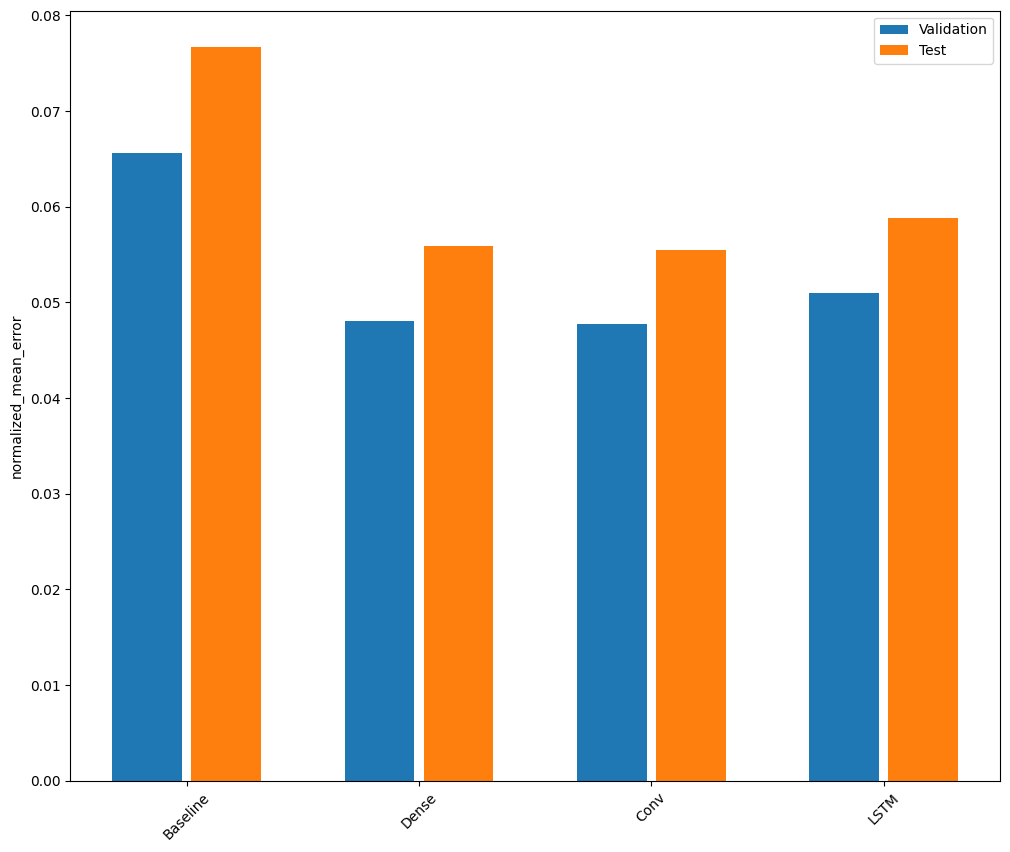

In [42]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'normalized_mean_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[0] for v in val_performance.values()]
test_mae = [v[0] for v in performance.values()]

plt.ylabel('normalized_mean_error')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

In [43]:
for name, value in performance.items():
  print(f'{name:12s}: MAE(%) {100*value[0]:0.2f} , ME(%) {100*value[1]:0.2f}')

Baseline    : MAE(%) 7.66 , ME(%) 0.00
Dense       : MAE(%) 5.59 , ME(%) 0.72
Conv        : MAE(%) 5.55 , ME(%) 1.24
LSTM        : MAE(%) 5.88 , ME(%) 0.27
